In [2]:
# Center generator
# Trajectory plotter
#
import os
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math
import json

0.2964368293116737
202


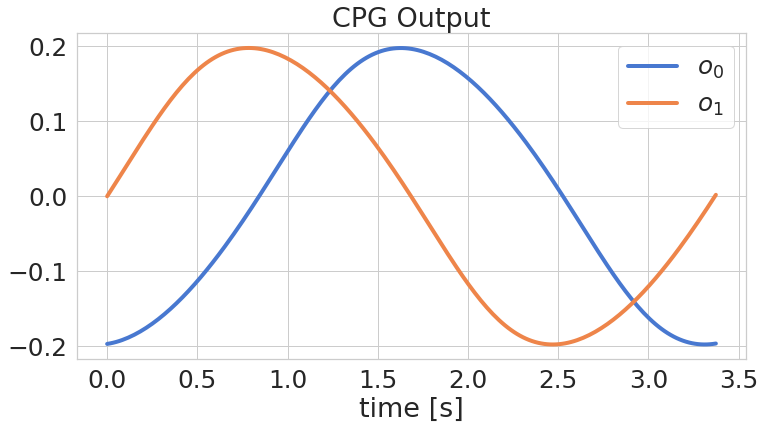

In [3]:
# SO(2) Parameters
phi   = 0.01*math.pi # SO(2) Frequency
alpha = 1.01         # SO(2) Alpha term
w11   = alpha*math.cos(phi)
w12   = alpha*math.sin(phi)
w21   =-w12
w22   = w11
x     = []
y     = []
t     = []

t.append(0)
x.append(-0.197)
y.append(0.0)

# Run for one period
period = 0
while y[period] >= y[0]:
    period = period+1
    t.append(period*0.0167)
    x.append(np.tanh(w11*x[period-1]+w12*y[period-1]));
    y.append(np.tanh(w22*y[period-1]+w21*x[period-1]));
    
while y[period] <= y[0]:
    period = period+1
    t.append(period*0.0167)
    x.append(np.tanh(w11*x[period-1]+w12*y[period-1]));
    y.append(np.tanh(w22*y[period-1]+w21*x[period-1]));    
   
# We set period a bit less
print(1/(period*0.0167))
period = period
print(period)

sns.set("notebook", font_scale=2.25, rc={"lines.linewidth": 4, 'figure.figsize':(12, 6)})
sns.set_palette("muted")
sns.set_style("whitegrid")

sns.lineplot(t,x)
ax=sns.lineplot(t,y)
ax.set(title="CPG Output", xlabel='time [s]')
ax.legend(loc='best',labels=["$o_{0}$","$o_{1}$"])

# plt.xlim((0, 196*0.0167))

# figure = ax.get_figure()
# figure.tight_layout()
# figure.savefig('./cpgout.png', dpi=200)

[-0.19629085003193042, -0.1803803684879207, -0.15030423182556196, -0.1082190635329925, -0.05613592095571705, 0.003603295724092634, 0.06687723768703556, 0.12579827631841214, 0.17021873540086016, 0.1937555738192009, 0.1958824414584636, 0.1798116888694056, 0.14960025950775502, 0.10739906577384264, 0.05522169395134108, -0.004574948781670868, -0.06782267707017003, -0.12657531224953125, -0.17069688838001223, -0.19390211387205736]
[0.006249717362699904, 0.06958848153189617, 0.1281375358718078, 0.1717668091697633, 0.19437367595071275, 0.1964003046602903, 0.18120355848904637, 0.15172887207945684, 0.11015129843719734, 0.0584812790943683, -0.00721669178311189, -0.0704724839678656, -0.12881358922563063, -0.17213263267456702, -0.19442094097003218, -0.19618250847744553, -0.18077260364239828, -0.15111838485887752, -0.10938829351684973, -0.057593993857780745]


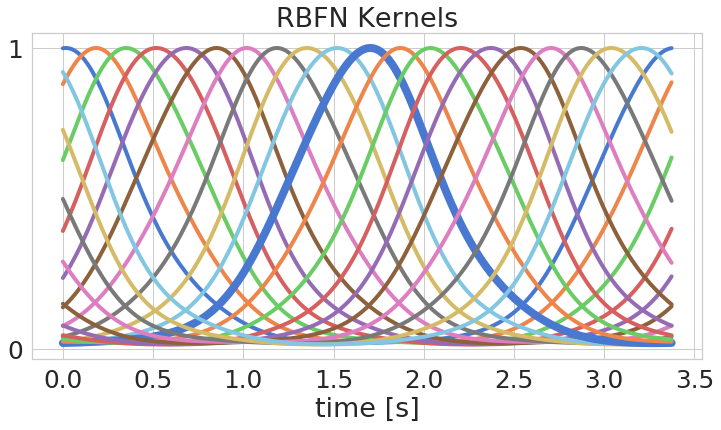

In [3]:
# RBFN Parameters
nc = 20;     # Number of kernels
W  = [0]*nc; # Weights 
s  = 0.04;   # Kernel variance
KENNE  = [0]*nc  # Kernels

ci = np.asarray(np.around(np.linspace(1, period, nc+1)), dtype=int)

ci = ci[:-1]

cx = [0] * (len(ci))
cy = [0] * (len(ci))
cxy = [0] * (len(ci))

xy = x+y

for k in range(len(ci)):
    cx[k] = x[ci[k]]
    cy[k] = y[ci[k]]

for i in range(nc):
    rx   = [q - cx[i] for q in x]
    ry   = [q - cy[i] for q in y]
    KENNE[i] = np.exp(-(np.power((rx),2) + np.power((ry),2))/s)
    
for i in range(nc):
    ax=sns.lineplot(t, KENNE[i])

#ax.lines[10].set_linestyle(":")
ax.lines[10].set_linewidth(8)
ax.set_yticks([0,1]) 
ax.set(title="RBFN Kernels", xlabel='time [s]')
# ax.legend(loc='best',labels=["o1","o2"])
#plt.legend([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], loc='lower right', bbox_to_anchor=(1.15, 0),ncol=2)
#plt.xlim((0, 196*0.0167))

print(cx)
print(cy)

# figure = ax.get_figure()
# figure.tight_layout()
# figure.savefig('./kernel.png', dpi=200)

In [4]:
# Prior knowledge
W = [0] * nc
alpha_learn = 0.1
network_output = 0
network_output_collector = []
time = np.linspace(0, 1, period)
target = []
target1 = []

# Generating target motion
for t in time:
    # MORF
    # BC JOINT
    #target.append(100)
    # CF JOINT
    #target.append(0.15*math.sin(2*math.pi*(t - 0.25)) + 2);
    #BC JOINT NO PRIOR
    target1.append(0)
    # CF JOINT NO PRIOR
    target.append(2.06);

    # ALPHA
    # BC JOINT
    #target.append(0.1*math.sin(2*math.pi*(t-0))-0.1)
    # CF JOINT
    #target1.append(0.2*math.sin(2*math.pi*(t - 0.25)) - 0.2)
    # BC JOINT
    #target.append(0.01)
    # CF JOINT NO PRIOR
    #target1.append(-1.57079633)
    # FT JOINT NO PRIOR
    #target.append(0.523598776);

    # LAIKAGO
    # BC (CF) JOINT
    #target1.append(0.025*math.sin(2*math.pi*(t-0)) - 0.45)
    # CF (FT) JOINT
    #target.append(-0.2*math.sin(2*math.pi*(t - 0.25)) + 0.6)
    
    # LAIKAGO2
    # CF JOINT
    #target1.append(0.436332)
    # FT JOINT
    #target.append(-1.74532925)


outH1 = []
outH2 = []

for i in range(300):
    network_output_collector = []

    for t in range(period):
        if t == 0:
            outH1.append(-0.2012)
            outH2.append(0.0)
        else:
            outH1.append(np.tanh(w11*outH1[t-1]+w12*outH2[t-1]))
            outH2.append(np.tanh(w22*outH2[t-1]+w21*outH1[t-1]))

        for j in range(nc):
            K = np.exp(-(np.power((outH1[t]-cx[j]), 2) +
                         np.power((outH2[t]-cy[j]), 2))/s)
            network_output = network_output + (W[j] * K)

        network_output_collector.append(network_output)

        network_output = 0

    for j in range(nc):
        W[j] = W[j] + alpha_learn * \
            (target[ci[j]] - network_output_collector[ci[j]])

ax = sns.lineplot(time, network_output_collector)
ax = sns.lineplot(time, target)
ax = sns.lineplot(time, target1)
ax.set(title="Prior knowledge", xlabel='time [s]')
ax.lines[1].set_linestyle("--")

print(W)

NameError: name 'nc' is not defined

In [5]:
W = [1] * nc
KENNE  = [0]*nc  # Kernels
alpha = 0.1
network_output = 0
network_output1 = 0
network_output2 = 0
network_output3 = 0
network_output4 = 0

# # Generating target motion
tr = 202

time = np.linspace(0, 1, tr)
target = []

for t in time:
    target.append(math.sin(2*math.pi*t))

global network_output_collector_collector
network_output_collector_collector = []

outH1 = []
outH2 = []

for i in range(0):
    network_output_collector = []

    for t in range(period):
        if t == 0:
            outH1.append(-0.2012)
            outH2.append(0.0)
        else:
            outH1.append(np.tanh(w11*outH1[t-1]+w12*outH2[t-1]))
            outH2.append(np.tanh(w22*outH2[t-1]+w21*outH1[t-1]))

        for j in range(nc):
            K = np.exp(-(np.power((outH1[t]-cx[j]), 2) +
                         np.power((outH2[t]-cy[j]), 2))/s)
            network_output = network_output + (W[j] * K)

        network_output_collector.append(network_output)

        network_output = 0

    for k in range(nc-1):
        W[k] = W[k] + alpha * (target[ci[k]] - network_output_collector[ci[k]])

    network_output_collector_collector.append(network_output_collector)

outH1 = []
outH2 = []
modi_kernel_output = []

network_output_collector = []
network_output_collector1 = []
network_output_collector2 = []
network_output_collector3 = []
network_output_collector4 = []

modification = [0] * len(W)
modification1 = [0] * len(W)
modification2 = [0] * len(W)
modification3 = [0] * len(W)
modification4 = [0] * len(W)

modi_kernel = 10
modification[modi_kernel] = modification[modi_kernel] - 1
modification1[modi_kernel] = modification1[modi_kernel] + 1
modification2[modi_kernel] = modification2[modi_kernel] - 2
modification3[modi_kernel] = modification3[modi_kernel] + 2

for t in range(tr):
    if t == 0:
        outH1.append(-0.2012)
        outH2.append(0.0)
    else:
        outH1.append(np.tanh(w11*outH1[t-1]+w12*outH2[t-1]))
        outH2.append(np.tanh(w22*outH2[t-1]+w21*outH1[t-1]))
        
    for j in range(nc):
        K = np.exp(-(np.power((outH1[t]-cx[j]), 2) +
                     np.power((outH2[t]-cy[j]), 2))/s)
        network_output = network_output + ((W[j]*modification[j]) * K)
        network_output1 = network_output1 + ((W[j]*modification1[j]) * K)
        network_output2 = network_output2 + ((W[j]*modification2[j]) * K)
        network_output3 = network_output3 + ((W[j]*modification3[j]) * K)
        network_output4 = network_output4 + ((W[j]*modification4[j]) * K)

        if j == modi_kernel:
            modi_kernel_output.append(K)

    network_output_collector.append(network_output)
    network_output_collector1.append(network_output1)
    network_output_collector2.append(network_output2)
    network_output_collector3.append(network_output3)
    network_output_collector4.append(network_output4)

    network_output = 0
    network_output1 = 0
    network_output2 = 0
    network_output3 = 0
    network_output4 = 0

ax = sns.lineplot((time*tr)*0.0167, network_output_collector4)
ax = sns.lineplot((time*tr)*0.0167, network_output_collector)
ax = sns.lineplot((time*tr)*0.0167, network_output_collector1)
ax = sns.lineplot((time*tr)*0.0167, network_output_collector2)
ax = sns.lineplot((time*tr)*0.0167, network_output_collector3)

ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle(":")
ax.lines[4].set_linestyle(":")

ax.legend(fontsize = 'xx-small', loc='lower left', labels=["$w_{10,j}=0$", "$w_{10,j}=-1$", "$w_{10,j}=1$", "$w_{10,j}=-2$", "$w_{10,j}=2$"])
ax.set(title="Kernel Modifications", xlabel='time [s]')

# figure = ax.get_figure()  
# figure.tight_layout()
# figure.savefig('./kernelmodifications2.png', dpi=200)

[Text(0.5, 0, 'time [s]'), Text(0.5, 1.0, 'Kernel Modifications')]